In [1]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 2. Load  the data
df = pd.read_csv("../../data/train.csv")
print("Shape:", df.shape)
df.head()

Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Columns with missing values: 
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


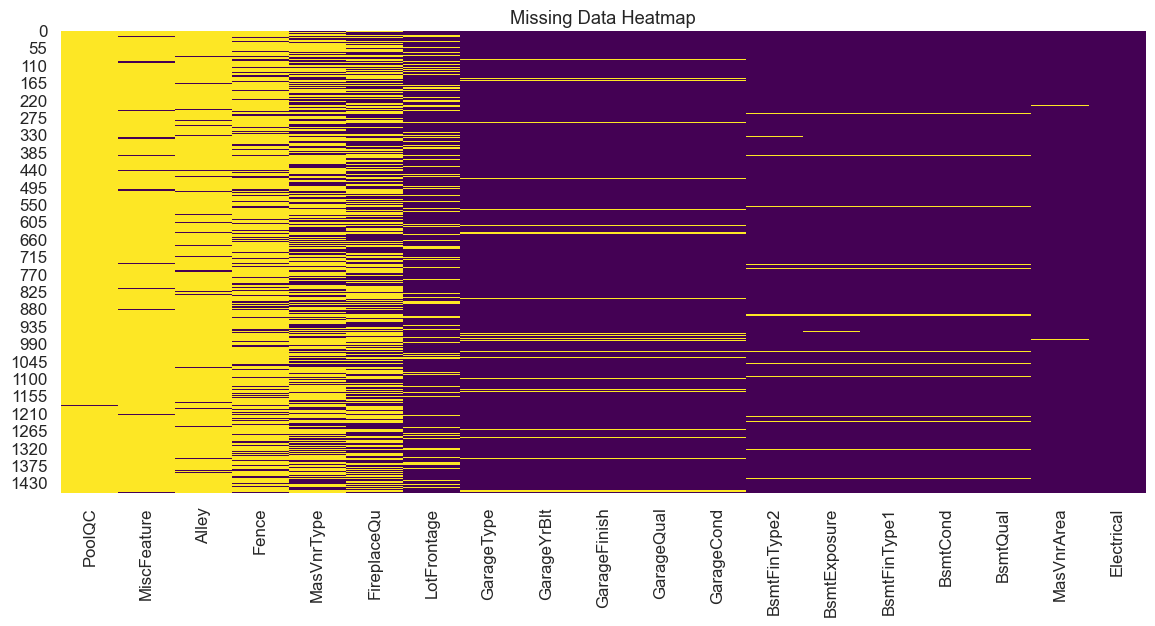

In [3]:
# 3. Missing value summary
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)
print(f"Columns with missing values: \n{missing}")

# Sort missing values columns
missing_cols = df.columns[df.isnull().any()]
sorted_cols = df[missing_cols].isnull().sum().sort_values(ascending = False).index

# Heatmap of missing values
plt.figure(figsize=(14, 6))
sns.heatmap(df[sorted_cols].isnull(), cbar=False, cmap="viridis"), # "coolwarm", "magma", "plasma", "Blues"
plt.title("Missing Data Heatmap")
plt.show()

Skewness = 1.8828757597682129
Kurtosis = 6.536281860064529


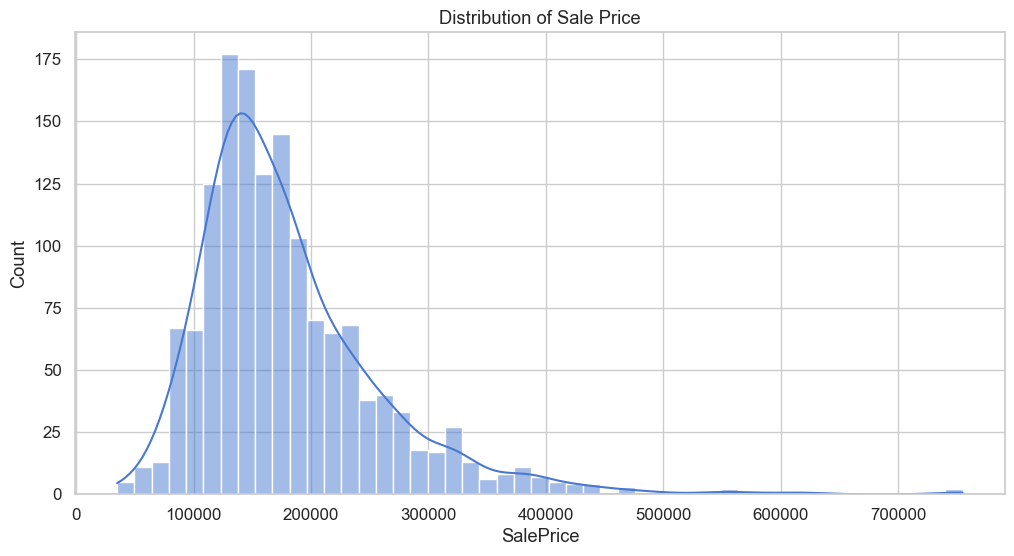

In [5]:
# 4. Distribution of Sale Price

# Skewness and Kurtosis
print(f"Skewness =",df['SalePrice'].skew())
print(f"Kurtosis =", df['SalePrice'].kurt())

# Histoplot Visualiztion
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

Skewness = 0.12134661989685333
Kurtosis = 0.809519155707878


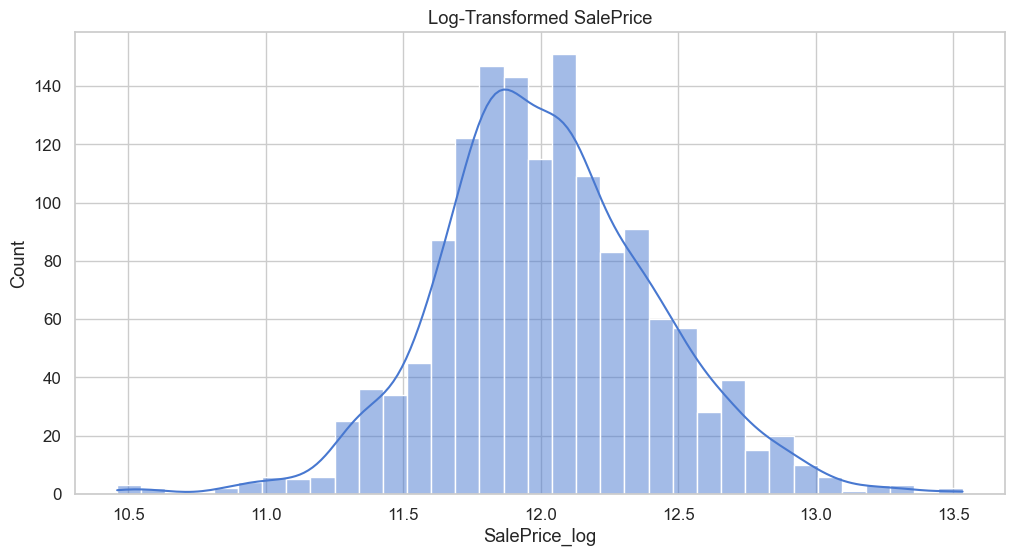

In [7]:
# Applying log1p When Sale Price is right skewed
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# Skewness and Kurtosis
print(f"Skewness =",df['SalePrice_log'].skew())
print(f"Kurtosis =", df['SalePrice_log'].kurt())

# Histoplot Visualiztion
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice_log'], kde=True)
plt.title("Log-Transformed SalePrice")
plt.show()

### Correlation Analysis

Top Correlated Features:
SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
Name: SalePrice, dtype: float64


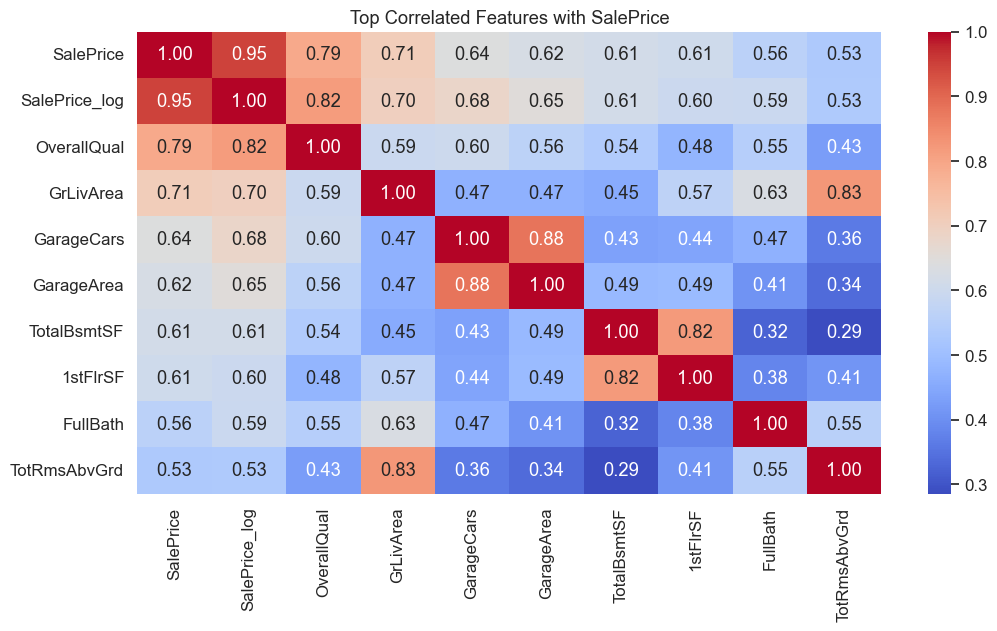

In [11]:
# 5. Correlation with Sale Price
corr = df.corr(numeric_only = True)
topCorr = corr['SalePrice'].sort_values(ascending = False).head(10)
print(f"Top Correlated Features:\n{topCorr}")

# HeatMap of Top Correlated Features
top_features = topCorr.index
plt.figure(figsize = (12,6))
sns.heatmap(df[top_features].corr(), annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with SalePrice")
plt.show()

### Numerical Features Analysis

Number of numerical features: 39


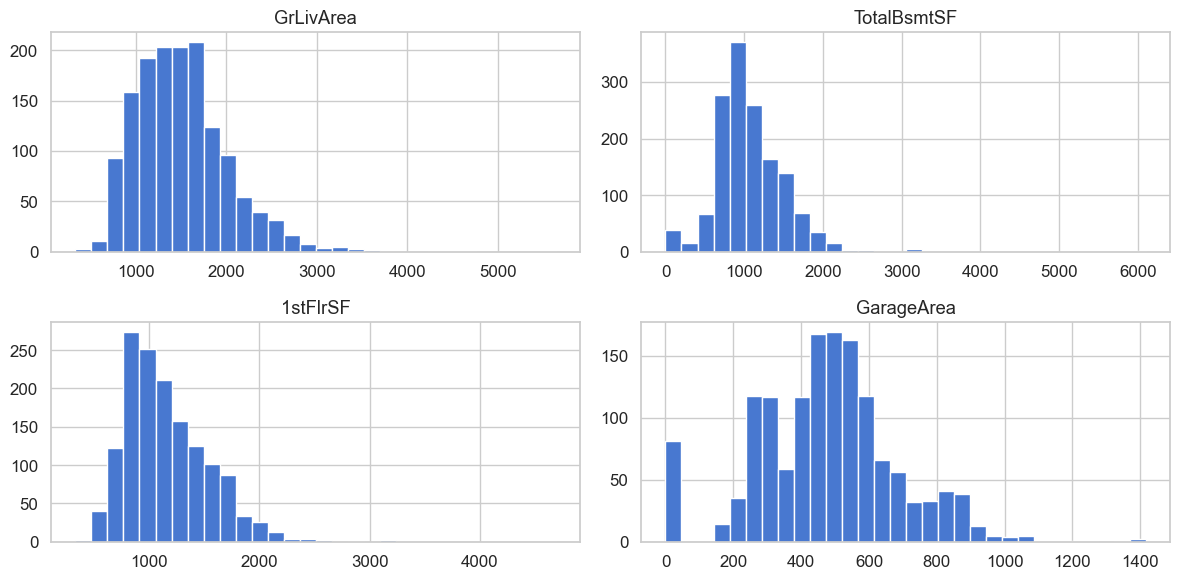

In [13]:
# 6. List numerical features
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(f"Number of numerical features: {len(numerical)}")

selected_numericals = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
df[selected_numericals].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

### Outlier Detection

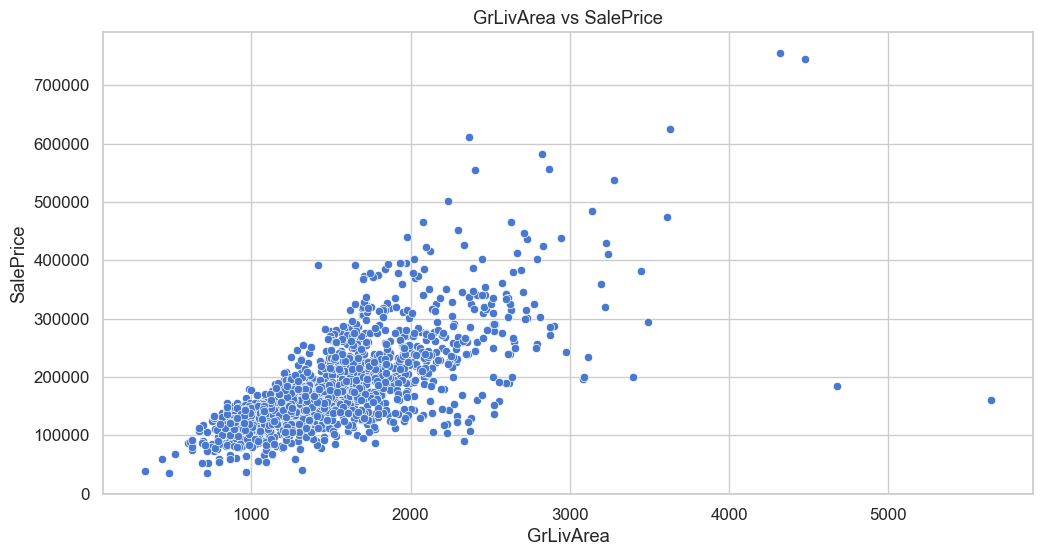

In [15]:
# 7. Outlier in GrLivArea vs SalePrice
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title("GrLivArea vs SalePrice")
plt.show()

# Removing known outliers
df = df[df['GrLivArea'] < 4500]

### Categorical Feature Analysis

Number of categorical features: 43

Street            2
Alley             2
CentralAir        2
Utilities         2
MasVnrType        3
LandSlope         3
PoolQC            3
PavedDrive        3
GarageFinish      3
BsmtQual          4
ExterQual         4
KitchenQual       4
BsmtCond          4
BsmtExposure      4
Fence             4
MiscFeature       4
LandContour       4
LotShape          4
FireplaceQu       5
Electrical        5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
BldgType          5
ExterCond         5
BsmtFinType1      6
RoofStyle         6
GarageType        6
Foundation        6
Heating           6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          7
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64


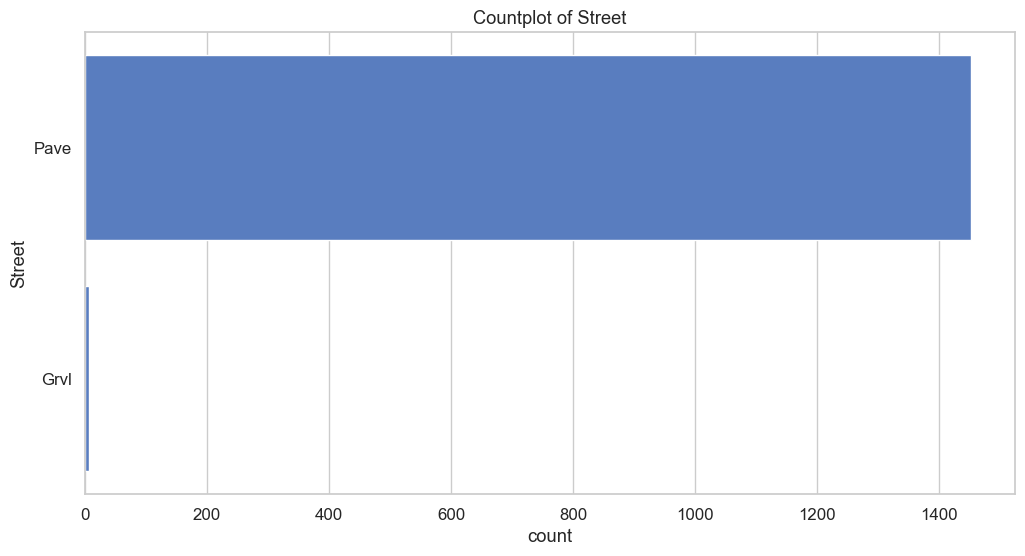

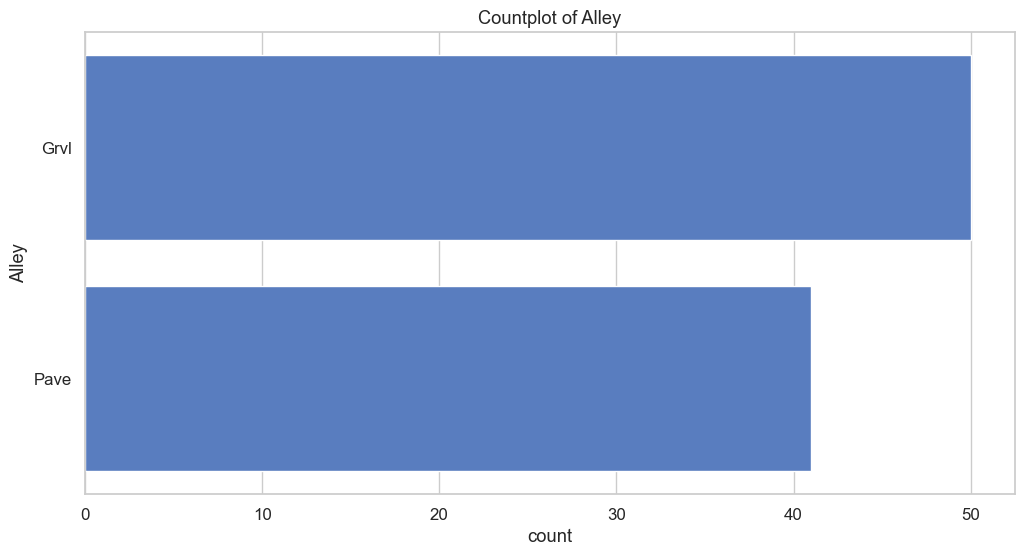

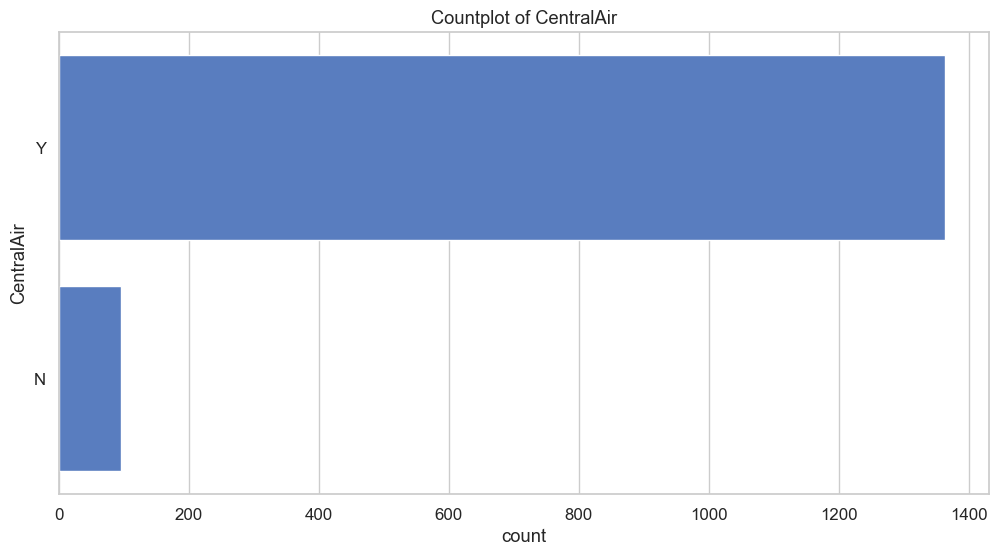

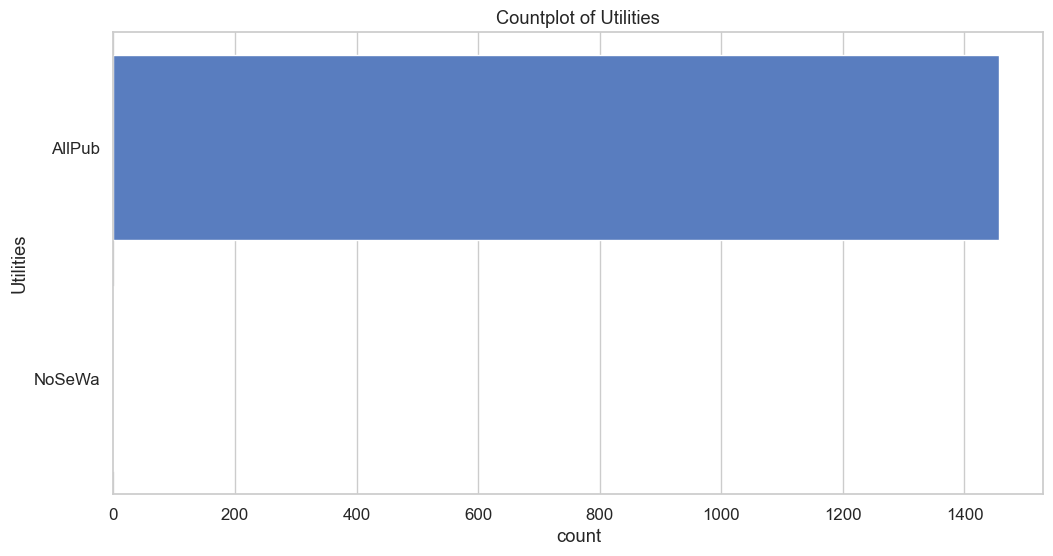

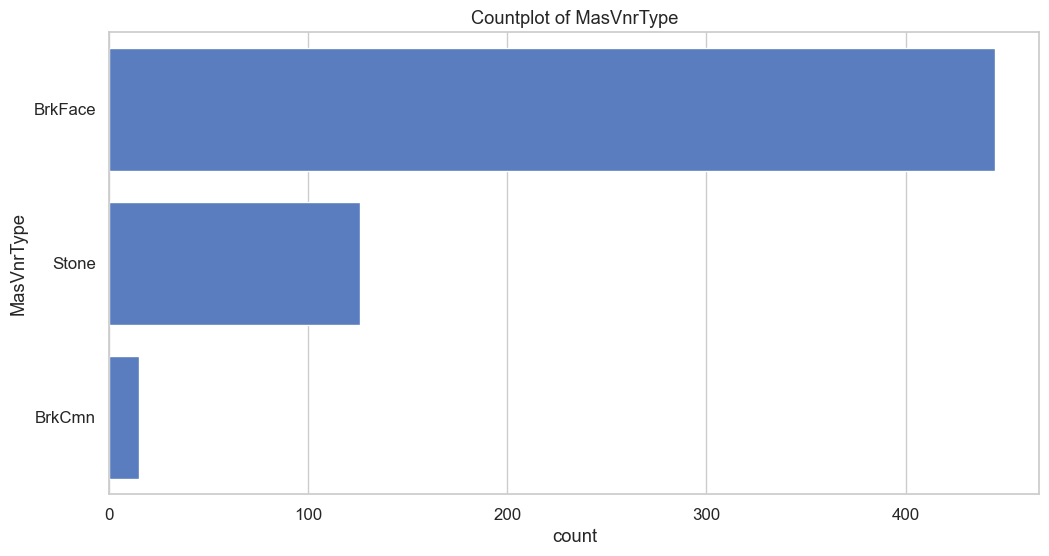

In [17]:
# 8. Countplots of top 5 categorical features by cardinality
categorical = df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical features: {len(categorical)}\n")

cat_sizes = df[categorical].nunique().sort_values()
print(cat_sizes)
top_cats = cat_sizes[cat_sizes < 20].index[:5]

for col in top_cats:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.show()

In [19]:
# 9. Organizing feature groups in a dictionary
df_numerical = df.drop(columns=["SalePrice"])
numerical = df_numerical.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()

feature_groups = {
    'numerical': numerical,
    'categorical': categorical,
    'top_corr': topCorr.index.tolist()
}

import json

# Saving feture identified for furthur analysis
with open('../../outputs/feature_groups.json', 'w') as f:
    json.dump(feature_groups, f)

print("Feature groups saved to following path: ../../outputs/feature_groups.json")

# Saving cleaned dataset to output folder for furthur analysis
df.to_csv("../../outputs/cleaned_train.csv", index=False)

print("Cleaned data frame saved to following path: ../../outputs/cleaned_train.csv")

Feature groups saved to following path: ../../outputs/feature_groups.json
Cleaned data frame saved to following path: ../../outputs/cleaned_train.csv


In [21]:
bold = '\033[1m'
underline = '\033[4m'
reset = '\033[0m'

print(f"{bold}{underline}EDA Summary:{reset}\n")
print(f"Dataset shape after outlier removal: {df.shape}\n")
print(f"{bold}{underline}Feature Groups:{reset}")
for k, v in feature_groups.items():
    print(f"  {k}: {len(v)} features")    

EDA Summary:

Dataset shape after outlier removal: (1458, 82)

Feature Groups:
  numerical: 38 features
  categorical: 43 features
  top_corr: 10 features
